<a href="https://colab.research.google.com/github/sneha2003er/project/blob/main/Fire_Detecton_using_ML_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import cv2


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset='/content/drive/MyDrive/data/dataset'

In [ ]:
print(type(dataset))

<class 'str'>


## Loading Data

In [ ]:
# Load images
train_fire_images = '/content/drive/MyDrive/data/dataset/img_data/train/fire'
train_default_images = '/content/drive/MyDrive/data/dataset/img_data/train/default'
train_smoke_images = '/content/drive/MyDrive/data/dataset/img_data/train/smoke'

test_fire_images = '/content/drive/MyDrive/data/dataset/img_data/test/fire'
test_default_images ='/content/drive/MyDrive/data/dataset/img_data/test/default'
test_smoke_images = '/content/drive/MyDrive/data/dataset/img_data/test/smoke'

In [ ]:
# load videos
train_videos = '/content/drive/MyDrive/data/dataset/video_data/test_videos'
test_videos = '/content/drive/MyDrive/data/dataset/video_data/test_videos'

In [ ]:
print(f"length of training fire images: {len(train_fire_images)}")
print(f"length of training default images: {len(train_default_images)}")
print(f"length of training smoke images: {len(train_smoke_images)}")

length of training fire images: 55
length of training default images: 58
length of training smoke images: 56


In [ ]:
print(f"length of testing fire images: {len(test_fire_images)}")
print(f"length of testing default images: {len(test_default_images)}")
print(f"length of testing smoke images: {len(test_smoke_images)}")

length of testing fire images: 54
length of testing default images: 57
length of testing smoke images: 55


In [ ]:
print(f"length of training videos: {len(train_videos)}")
print(f"length of testing  videos: {len(test_videos)}")

length of training videos: 58
length of testing  videos: 58


In [ ]:
def load_images_from_folder(folder, num):
    images = []
    all_files = os.listdir(folder)
    selected_files = random.sample(all_files, num)
    for filename in selected_files:
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images



## randomly select images

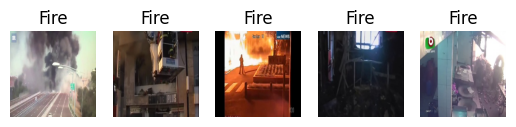

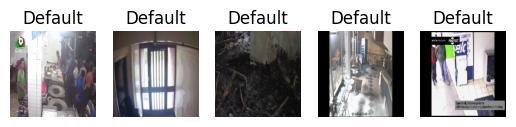

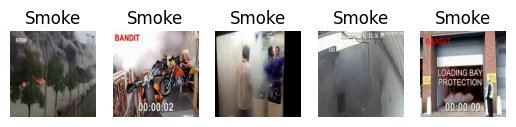

In [ ]:
def display_random_images(folder_path, title, num=5):
    image_list = load_images_from_folder(folder_path, num)
    for idx, img in enumerate(image_list):
        plt.subplot(1, num, idx+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.show()

display_random_images(train_fire_images, "Fire")
display_random_images(train_default_images, "Default")
display_random_images(train_smoke_images, "Smoke")

## Class Distribution

In [ ]:
# Compute the number of images in each directory
num_train_fire = len(os.listdir(train_fire_images))
num_train_default = len(os.listdir(train_default_images))
num_train_smoke = len(os.listdir(train_smoke_images))

num_test_fire = len(os.listdir(test_fire_images))
num_test_default = len(os.listdir(test_default_images))
num_test_smoke = len(os.listdir(test_smoke_images))



In [ ]:
# Display the class distribution for training data
print("Training Data Distribution:")
print(f"Fire: {num_train_fire}")
print(f"Default: {num_train_default}")
print(f"Smoke: {num_train_smoke}")
print("\n")

# Display the class distribution for testing data
print("Testing Data Distribution:")
print(f"Fire: {num_test_fire}")
print(f"Default: {num_test_default}")
print(f"Smoke: {num_test_smoke}")


Training Data Distribution:
Fire: 437
Default: 437
Smoke: 437


Testing Data Distribution:
Fire: 84
Default: 84
Smoke: 84


## Histogram-Class Distribution

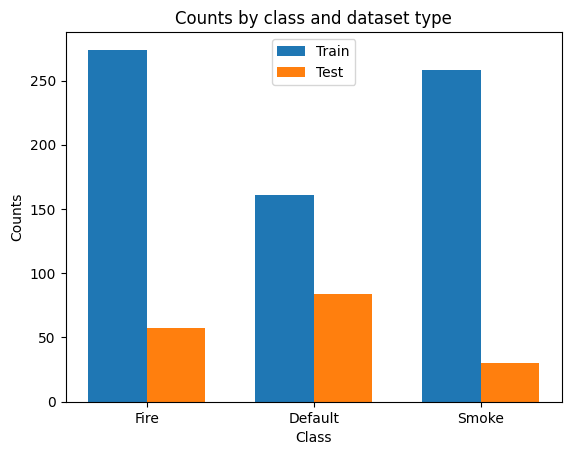

In [ ]:
# Optionally, you can also plot this distribution


labels = ['Fire', 'Default', 'Smoke']
train_counts = [num_train_fire, num_train_default, num_train_smoke]
test_counts = [num_test_fire, num_test_default, num_test_smoke]

x = range(len(labels))  # the label locations

fig, ax = plt.subplots()
bar_width = 0.35
rects1 = ax.bar(x, train_counts, bar_width, label='Train')
rects2 = ax.bar([i + bar_width for i in x], test_counts, bar_width, label='Test')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Class')
ax.set_ylabel('Counts')
ax.set_title('Counts by class and dataset type')
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()


## HSV

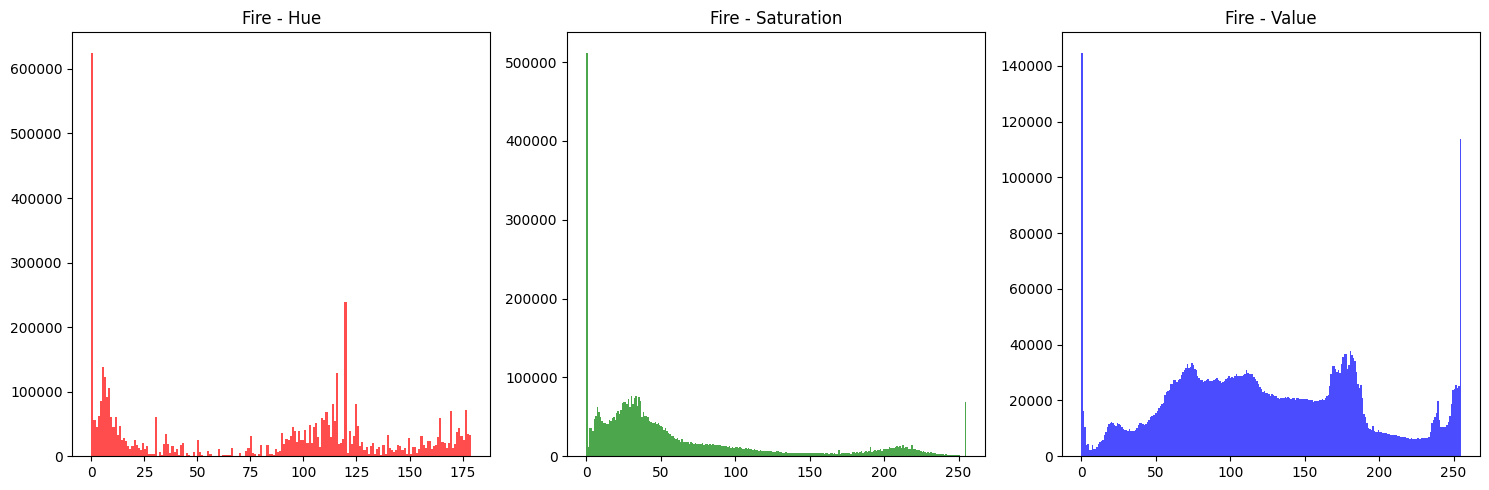

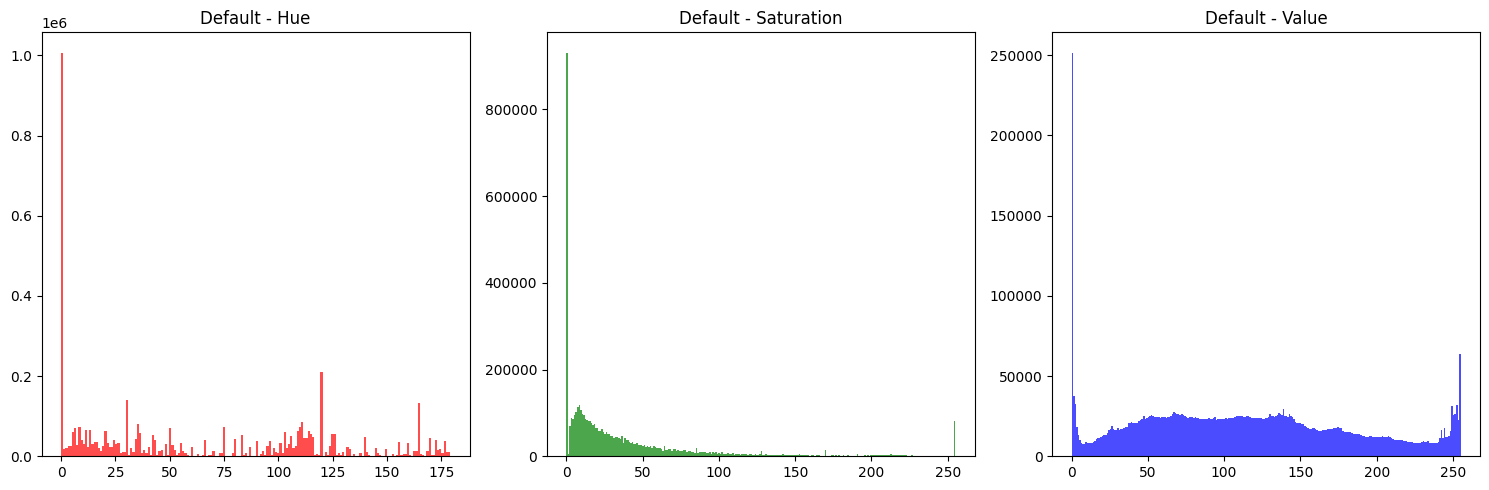

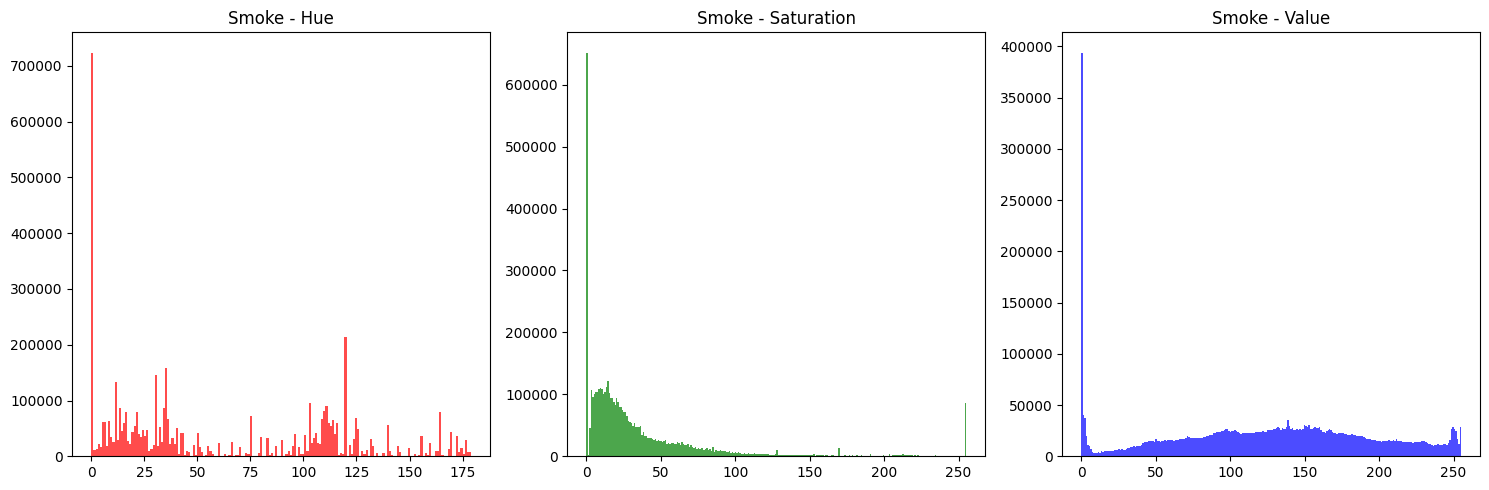

In [ ]:
def plot_hsv_histogram(folder_path, title, num_samples=100):
    # Randomly select a sample of images from the folder
    all_files = os.listdir(folder_path)
    selected_files = random.sample(all_files, num_samples)

    hues = []
    saturations = []
    values = []

    for filename in selected_files:
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

            # Append values to lists
            hue, sat, val = cv2.split(hsv_img)
            hues.extend(hue.ravel())
            saturations.extend(sat.ravel())
            values.extend(val.ravel())

    # Plot histograms
    plt.figure(figsize=(15, 5))

    # Hue
    plt.subplot(1, 3, 1)
    plt.hist(hues, bins=180, color='red', alpha=0.7)
    plt.title(f"{title} - Hue")

    # Saturation
    plt.subplot(1, 3, 2)
    plt.hist(saturations, bins=256, color='green', alpha=0.7)
    plt.title(f"{title} - Saturation")

    # Value
    plt.subplot(1, 3, 3)
    plt.hist(values, bins=256, color='blue', alpha=0.7)
    plt.title(f"{title} - Value")

    plt.tight_layout()
    plt.show()

plot_hsv_histogram(train_fire_images, "Fire")
plot_hsv_histogram(train_default_images, "Default")
plot_hsv_histogram(train_smoke_images, "Smoke")

## framing video

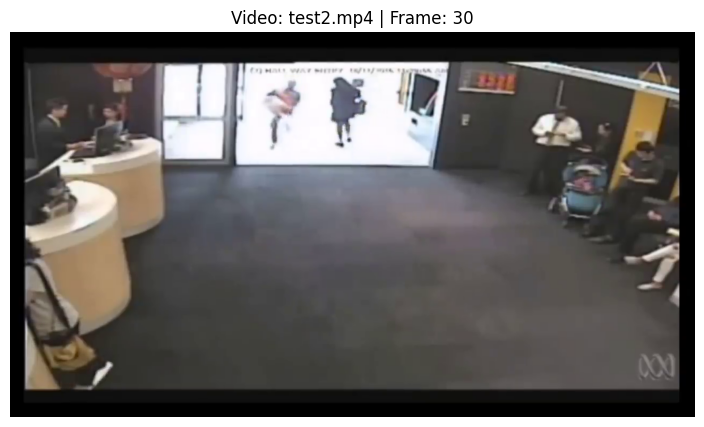

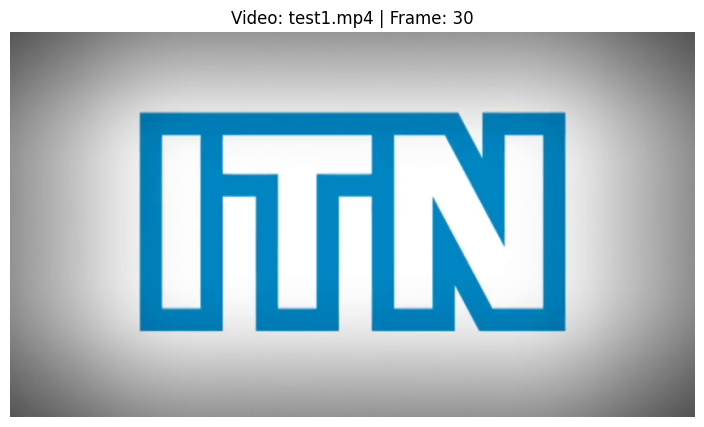

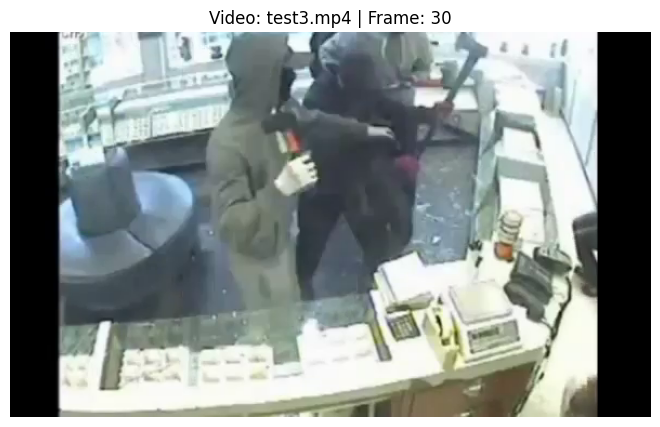

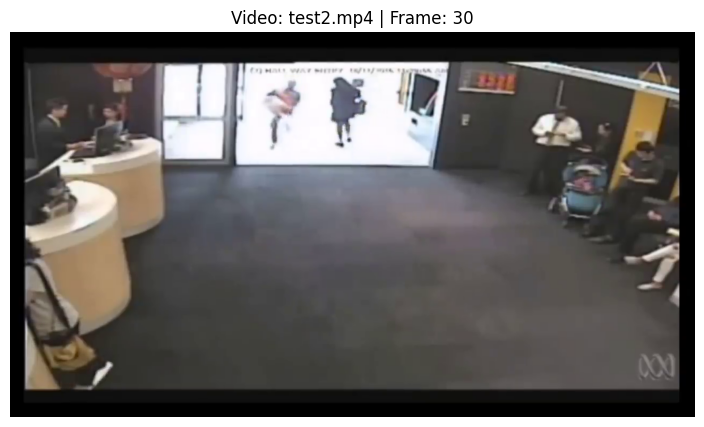

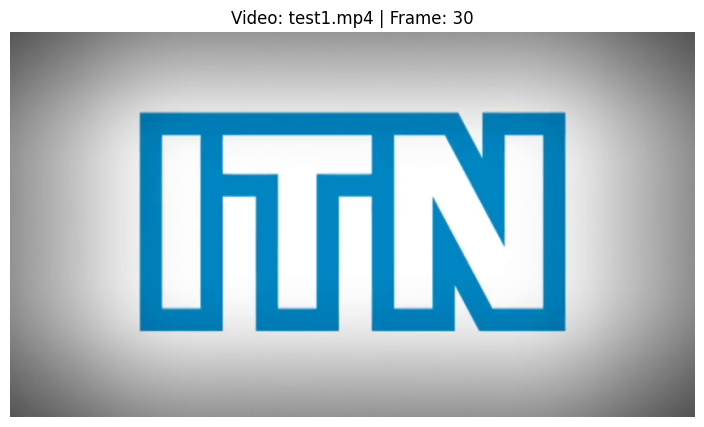

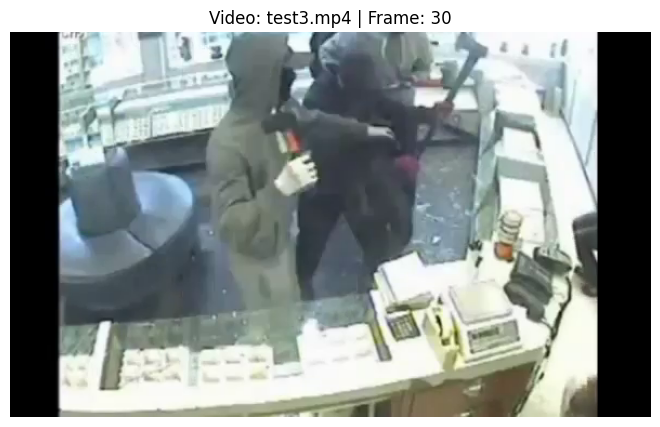

In [ ]:
 def examine_video_frames(video_directory, interval=30):
    """
    Extract and display frames from videos in a directory at specified intervals.

    Parameters:
    - video_directory: Directory containing video files.
    - interval: Interval at which frames are captured (every 'interval' frames).
    """

    # List all video files in the directory
    video_files = [f for f in os.listdir(video_directory) if f.endswith(('.mp4', '.avi', '.mov'))]  # Adjust the extensions as needed

    for video_file in video_files:
        video_path = os.path.join(video_directory, video_file)

        # Open the video file
        cap = cv2.VideoCapture(video_path)

        if not cap.isOpened():
            print(f"Error: Could not open video {video_file}.")
            continue

        frame_count = 0
        displayed_count = 1

        while True:
            ret, frame = cap.read()  # Read a frame
            frame_count += 1

            # Break the loop if video has ended
            if not ret:
                break

            # If the frame number is a multiple of the interval, display the frame
            if frame_count % interval == 0:
                plt.figure(figsize=(10, 5))
                plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
                plt.title(f"Video: {video_file} | Frame: {frame_count}")
                plt.axis('off')
                plt.show()

                # Let's just show one frame from each video for demonstration
                break

        cap.release()

# Examine videos from training and testing directories
examine_video_frames(train_videos, interval=30)
examine_video_frames(test_videos, interval=30)

